# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [3]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. The data set I have choosen is the 1994 Census information.
2. I will be predicting the salary of an individual, the label will be "income_binary".
3. This is a supervised learning problem, specifically a binary classification problem.
4. My features are: 'age', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'race', 'sex_selfID',
   'hours-per-week', 'native-country'.
5. A company could utilize this model to compare their compensation versus the national average. Can help eliminate  any bias that could prevent fair compensation for employees.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
df.shape

(32561, 15)

In [5]:
df.sort_values('education-num')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
22940,25.0,Private,266820,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Non-Female,0,0,35.0,Mexico,<=50K
13248,68.0,Private,168794,Preschool,1,Never-married,Machine-op-inspct,Not-in-family,White,Non-Female,0,0,10.0,United-States,<=50K
21370,61.0,Private,98350,Preschool,1,Married-spouse-absent,Other-service,Not-in-family,Asian-Pac-Islander,Non-Female,0,0,40.0,China,<=50K
25943,19.0,Private,277695,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Non-Female,0,0,36.0,Hong,<=50K
21388,24.0,Private,196678,Preschool,1,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,42.0,Local-gov,185129,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,43.0,NaN,>50K
12074,33.0,Self-emp-inc,239018,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Non-Female,0,0,60.0,United-States,<=50K
28758,65.0,Private,176796,Doctorate,16,Widowed,Prof-specialty,Not-in-family,White,Female,0,0,40.0,United-States,<=50K
4597,55.0,Private,50164,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,60.0,United-States,>50K


In [6]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [7]:
# Handle missing data
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [8]:
df['age_na'] = df['age'].isnull()
df['hours-per-week_na'] = df['hours-per-week'].isnull()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,age_na,hours-per-week_na
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K,False,False
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K,False,False
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K,False,False
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K,False,False
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,False,False


In [9]:
mean_ages=df['age'].mean()
mean_hours=df['hours-per-week'].mean()

df['age'].fillna(value=mean_ages, inplace=True)
df['hours-per-week'].fillna(value=mean_hours, inplace=True)

In [10]:
np.sum(df['age'].isnull(), axis = 0)

0

In [11]:
np.sum(df['hours-per-week'].isnull(), axis = 0)

0

In [12]:
df.drop(columns=['age_na', 'hours-per-week_na'], inplace=True)

Thoughts...

Is it worth it to remove about 4.2k rows that contain missing values that cannot be filled using the mean?
Below I will compare a data set with the null values against a data set without the null values using describe()

In [13]:
df_dropped = df.dropna()

In [14]:
missing_data = df_dropped.isnull().sum()
print(missing_data)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex_selfID        0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_binary     0
dtype: int64


In [15]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428
std,13.613868,1.055500e+05,2.572720,2420.191974,402.960219,12.291939
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000


In [16]:
df_dropped.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.443253,1.897938e+05,10.121312,628.947450,88.372489,40.936568
std,13.108731,1.056530e+05,2.549995,2447.583175,404.298370,11.931194
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000


It looks like removing the missing value rows did not signficantly change the data's relationship.
Going forward I will be using the filtered dataset that does not contain any missing values

In [17]:
df = df_dropped
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=50K
32557,40.0,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Non-Female,0,0,40.0,United-States,>50K
32558,58.0,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K
32559,22.0,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Non-Female,0,0,20.0,United-States,<=50K


Before I encode categorical features, I'm going to remove the columns want to use.

In [18]:
filtered_df_columns = ['age', 'workclass', 'education-num', 'marital-status', 'occupation', 'race', 
                 'sex_selfID', 'hours-per-week', 'native-country', 'income_binary']

In [19]:
df = df[filtered_df_columns]
df

,age,workclass,education-num,marital-status,occupation,race,sex_selfID,hours-per-week,native-country,income_binary
0,39.0,State-gov,13,Never-married,Adm-clerical,White,Non-Female,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Non-Female,13.0,United-States,<=50K
2,38.0,Private,9,Divorced,Handlers-cleaners,White,Non-Female,40.0,United-States,<=50K
3,53.0,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Non-Female,40.0,United-States,<=50K
4,28.0,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,12,Married-civ-spouse,Tech-support,White,Female,38.0,United-States,<=50K
32557,40.0,Private,9,Married-civ-spouse,Machine-op-inspct,White,Non-Female,40.0,United-States,>50K
32558,58.0,Private,9,Widowed,Adm-clerical,White,Female,40.0,United-States,<=50K
32559,22.0,Private,9,Never-married,Adm-clerical,White,Non-Female,20.0,United-States,<=50K


Below I changed the values for income_binary and sex_selfID to numerical values

In [20]:
print(df['income_binary'].unique())
print(df['sex_selfID'].unique())

['<=50K' '>50K']
['Non-Female' 'Female']


In [21]:
df['income_binary'] = df['income_binary'].map({'<=50K': 0, '>50K': 1})
df['sex_selfID'] = df['sex_selfID'].map({'Non-Female': 1, 'Female': 0})

/tmp/ipykernel_1631/1674003460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income_binary'] = df['income_binary'].map({'<=50K': 0, '>50K': 1})
/tmp/ipykernel_1631/1674003460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex_selfID'] = df['sex_selfID'].map({'Non-Female': 1, 'Female': 0})


In [22]:
to_encode = list(df.select_dtypes(include=['object']).columns)
df[to_encode].nunique()

workclass          7
marital-status     7
occupation        14
race               5
native-country    41
dtype: int64

In [23]:
encoder = OneHotEncoder(sparse_output=False)

df.drop(columns = 'income_binary')

# Iterate over each categorical column
for column in df.select_dtypes(include=['object']).columns:
    # Get the top 10 categories for the column
    top_categories = df[column].value_counts().nlargest(10).index
    
    # Create a new column that maps the top 10 categories to the original column
    df[column] = df[column].apply(lambda x: x if x in top_categories else 'Other')
    
    # Apply OneHotEncoder
    df_enc = pd.DataFrame(encoder.fit_transform(df[[column]]))
    df_enc.columns = encoder.get_feature_names_out([column])
    
    # Drop the original column and join the encoded columns
    df = df.drop(columns=[column])
    df = df.join(df_enc)

/tmp/ipykernel_1631/4239676192.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: x if x in top_categories else 'Other')


In [24]:
df.head(10)

,age,education-num,sex_selfID,hours-per-week,income_binary,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Cuba,native-country_El-Salvador,native-country_England,native-country_Germany,native-country_India,native-country_Mexico,native-country_Other,native-country_Philippines,native-country_Puerto-Rico,native-country_United-States
0,39.0,13,1,40.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,50.0,13,1,13.0,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,38.0,9,1,40.0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,53.0,7,1,40.0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,28.0,13,0,40.0,0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,37.0,14,0,40.0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,49.0,5,0,16.0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,52.0,9,1,45.0,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,31.0,14,0,50.0,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,42.0,13,1,40.0,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
print(df.dtypes)

age                                     float64
education-num                             int64
sex_selfID                                int64
hours-per-week                          float64
income_binary                             int64
workclass_Federal-gov                   float64
workclass_Local-gov                     float64
workclass_Private                       float64
workclass_Self-emp-inc                  float64
workclass_Self-emp-not-inc              float64
workclass_State-gov                     float64
workclass_Without-pay                   float64
marital-status_Divorced                 float64
marital-status_Married-AF-spouse        float64
marital-status_Married-civ-spouse       float64
marital-status_Married-spouse-absent    float64
marital-status_Never-married            float64
marital-status_Separated                float64
marital-status_Widowed                  float64
occupation_Adm-clerical                 float64
occupation_Craft-repair                 

Now I will check for class imbalance.

Class counts:
 0    22654
1     7508
Name: income_binary, dtype: int64

Class percentages:
 0    75.107751
1    24.892249
Name: income_binary, dtype: float64


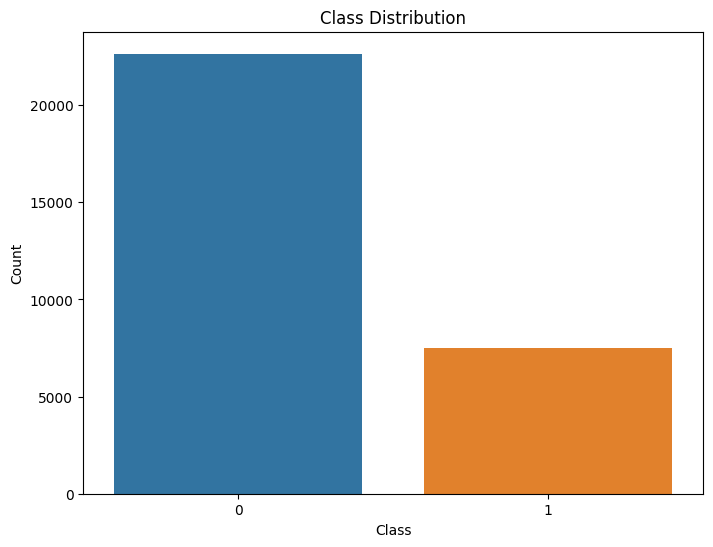

In [26]:
# Check value counts
class_counts = df['income_binary'].value_counts()
print("Class counts:\n", class_counts)

# Calculate percentage
total_count = len(df)
class_percentages = (class_counts / total_count) * 100
print("\nClass percentages:\n", class_percentages)

# Bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='income_binary', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

This bar chart demonstrates a significant class imbalance where the "<=50k" class is more prevalent.

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After inspecting the data, I have a new features list...

My features included the newly one hot coded columns

To handle the class imbalance, after I split my data into training and testing sets, I will utilize class weights in my model: Random Forest.

I decided to use Random Forest as it's well suited for data that contains both numerical and categorical data.

I plan too...

1. Create labeled examples from the data set.
2. Split the data into training and test data sets
3. Train, test and evaluate Random Forest.
5. Visualize and compare the performance of of the models.


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [28]:
# Create labeled examples
y = df['income_binary']
X = df.drop(columns = 'income_binary', axis=1)

In [29]:
# Create training and test sets out of the labeled examples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

In [30]:
md = [4, 8]
n_est = [200, 300]
# Parameter grid for Random Forest
param_grid_rf = {
    'max_depth': md,
    'n_estimators': n_est
}

In [31]:
# # Initialize Random Forest and GridSearchCV
print('Running Grid Search...')

rf_model = RandomForestClassifier()
rf_grid = GridSearchCV(rf_model, param_grid_rf, scoring='roc_auc', verbose=1)

rf_grid_search = rf_grid.fit(X_train, y_train)


print('Done')

# Print best parameters and best score for Random Forest
print(f'Best parameters for Random Forest: {rf_grid_search.best_params_}')
print(f'Best score for Random Forest: {rf_grid_search.best_score_}')

Running Grid Search...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Done
Best parameters for Random Forest: {'max_depth': 8, 'n_estimators': 300}
Best score for Random Forest: 0.8231654251106214


In [32]:
best_rf_model = RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=200)
print('Begin Random Forest Implementation...')
best_rf_model.fit(X_train, y_train)
# 3. Make predictions on the test data using the predict_proba() method and assign the 
# result to a list named 'best_rf_predictions' 
best_rf_preds = best_rf_model.predict_proba(X_test)
print('End')

best_rf_predictions = list(best_rf_preds[:, -1])

Begin Random Forest Implementation...
End


Above I've trained a model using the best hyperparameter values in my dictionary. I want to
explore different models using different values that weren't in my dictionary.
(I didn't just add more values to my dictionary because the computational time increased significally)

In [33]:
# Experiment model 1
rf_model1 = RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=300)
print('Begin Random Forest Implementation...')
rf_model1.fit(X_train, y_train)
# 3. Make predictions on the test data using the predict_proba() method and assign the 
# result to a list named 'best_rf_predictions' 
rf_preds1 = rf_model1.predict_proba(X_test)
print('End')

rf_predictions1 = list(rf_preds1[:, -1])

Begin Random Forest Implementation...
End


In [34]:
# Experiment model 2
rf_model2 = RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=150)
print('Begin Random Forest Implementation...')
rf_model2.fit(X_train, y_train)
# 3. Make predictions on the test data using the predict_proba() method and assign the 
# result to a list named 'best_rf_predictions' 
rf_preds2 = rf_model2.predict_proba(X_test)
print('End')

rf_predictions2 = list(rf_preds2[:, -1])

Begin Random Forest Implementation...
End


In [35]:
# Experiment model 3
rf_model3 = RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=350)
print('Begin Random Forest Implementation...')
rf_model3.fit(X_train, y_train)
# 3. Make predictions on the test data using the predict_proba() method and assign the 
# result to a list named 'best_rf_predictions' 
rf_preds3 = rf_model3.predict_proba(X_test)
print('End')

rf_predictions3 = list(rf_preds3[:, -1])

Begin Random Forest Implementation...
End


Evaluate the Performance of the models using ROC and AUC

In [36]:
print('Computing ROC Curve...')

# Use roc_curve to record fpr and tpr for best_rf_model
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, best_rf_predictions)

# Use roc_curve to record fpr and tpr for rf_model1
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, rf_predictions1)

# Use roc_curve to record fpr and tpr for rf_model1
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, rf_predictions2)

# Use roc_curve to record fpr and tpr for rf_model1
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, rf_predictions3)

print('End')

Computing ROC Curve...
End


Plotting ROC Curve...


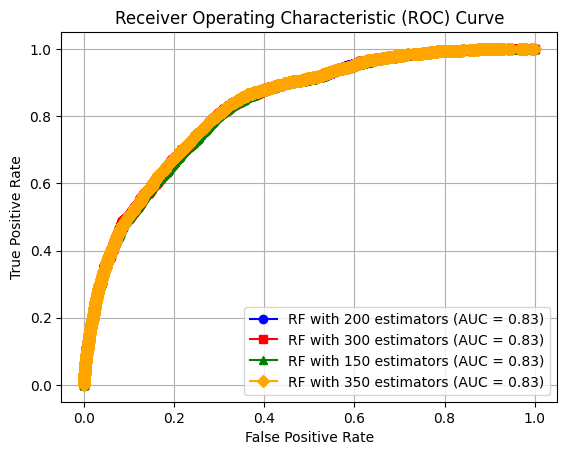

In [37]:
print('Plotting ROC Curve...')

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(fpr_best, tpr_best, marker='o', color='blue', label='RF with 200 estimators (AUC = %0.2f)' % auc(fpr_best, tpr_best))
plt.plot(fpr_1, tpr_1, marker='s', color='red', label='RF with 300 estimators (AUC = %0.2f)' % auc(fpr_1, tpr_1))
plt.plot(fpr_2, tpr_2, marker='^', color='green', label='RF with 150 estimators (AUC = %0.2f)' % auc(fpr_2, tpr_2))
plt.plot(fpr_3, tpr_3, marker='D', color='orange', label='RF with 350 estimators (AUC = %0.2f)' % auc(fpr_3, tpr_3))

plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

The AUC scores were all the same, 0.83 indicating a high model performance.

In [38]:
# I decided to do a further evaluation of my model using cross-validation
scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='roc_auc')
print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Cross-Validation Accuracy: {scores.mean()}')

Cross-Validation Accuracy Scores: [0.8206996  0.81864209 0.82886381 0.8302972  0.82945668]
Mean Cross-Validation Accuracy: 0.8255918762474082


The mean was 0.8255918762474082, which is slightly lower than my results using the ROC Curve, however this also further shows that my model is high performing.

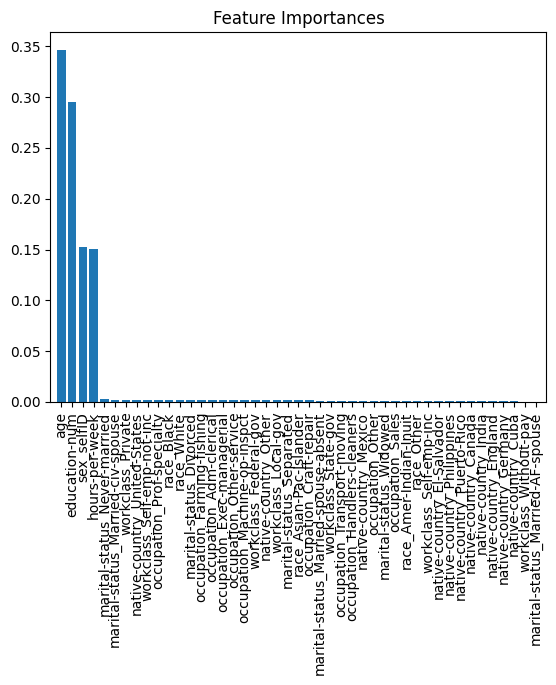

In [39]:
# Identify feature importances
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

The features: 'age' and 'education-num' were the most important when making predictions about an individual's salary. With 'hours-per-week' and 'sex_selfID' coming in 3rd and 4th. The feature 'sex_selfID' being so high raises concerns about potential bias relating to compensation between genders. Even though I used class weights which helped improve imbalance and bias, gender is still a high importance feature.